###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as alg
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

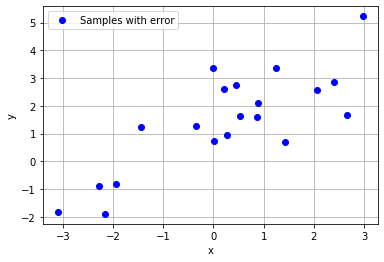

In [2]:
# Generates data
rnd.seed(10)
m = 20
wreal = np.array([1, 1])
x = rnd.normal(0,2,(m,1))
poly = PolynomialFeatures(1)
X = poly.fit_transform(x)
sigma = 1
err = rnd.normal(0,sigma,m)
y = X.dot(wreal) + err
plt.plot(X[:,1],y,'bo', markersize = 6, label = 'Samples with error')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

In [3]:
# Preprocessing
degree = 1
poly = PolynomialFeatures(degree)
X = poly.fit_transform(x)
scaler = StandardScaler()
X[:,1:] = scaler.fit_transform(X[:,1:])

In [4]:
# MLE estimation
wmle = alg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(wmle)
wmle = alg.lstsq(X,y,rcond=None)[0]
print(wmle)
wmle = alg.pinv(X).dot(y)
print(wmle)

[1.46223191 1.42362926]
[1.46223191 1.42362926]
[1.46223191 1.42362926]


In [5]:
# OLS (MLE) and centering data
w = alg.pinv(X[:,1:]).dot(y)
print(w)
w0 = y.mean() - X[:,1:].mean(axis=0).dot(w) # average output - average predictive output
print(w0)

[1.42362926]
1.4622319091146385


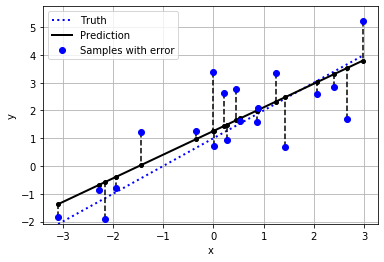

In [6]:
# Plotting results
pts = 200
x = np.linspace(min(x),max(x),pts).reshape(pts,1)
poly = PolynomialFeatures(1)
mesh = poly.fit_transform(x)
f = mesh.dot(wreal)
plt.plot(mesh[:,1],f,'b:', linewidth = 2, label = 'Truth')
poly = PolynomialFeatures(degree)
mesh = poly.fit_transform(x)
mesh[:,1:] = scaler.transform(mesh[:,1:])
h = mesh.dot(wmle)
mesh[:,1:] = scaler.inverse_transform(mesh[:,1:])
plt.plot(mesh[:,1],h,'k-', linewidth = 2, label = 'Prediction')
h = X.dot(wmle)
X[:,1:] = scaler.inverse_transform(X[:,1:])
plt.plot(X[:,1],h,'ko',markersize = 4)
for i in range(m):
    plt.plot([X[i,1],X[i,1]],[y[i], h[i]],'k--')
plt.plot(X[:,1],y,'bo', markersize = 6, label = 'Samples with error')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([1.1*y.min(),1.1*y.max()])
plt.grid()
plt.legend()

In [7]:
# This decreases as we increase the degree (complexity of the model)
mse = ((h-y)**2).sum()/m
print('Mean Squared Error(MSE):', mse)

Mean Squared Error(MSE): 1.085244433315736


In [8]:
# This value approximates sigma when we use a linear model
print('Empirical Variance of Residual Squared Errors:', np.sqrt(mse))

Empirical Variance of Residual Squared Errors: 1.0417506579387104
